# Визуализация данных. Matplotlib

# Анатомия графиков в Matplotlib

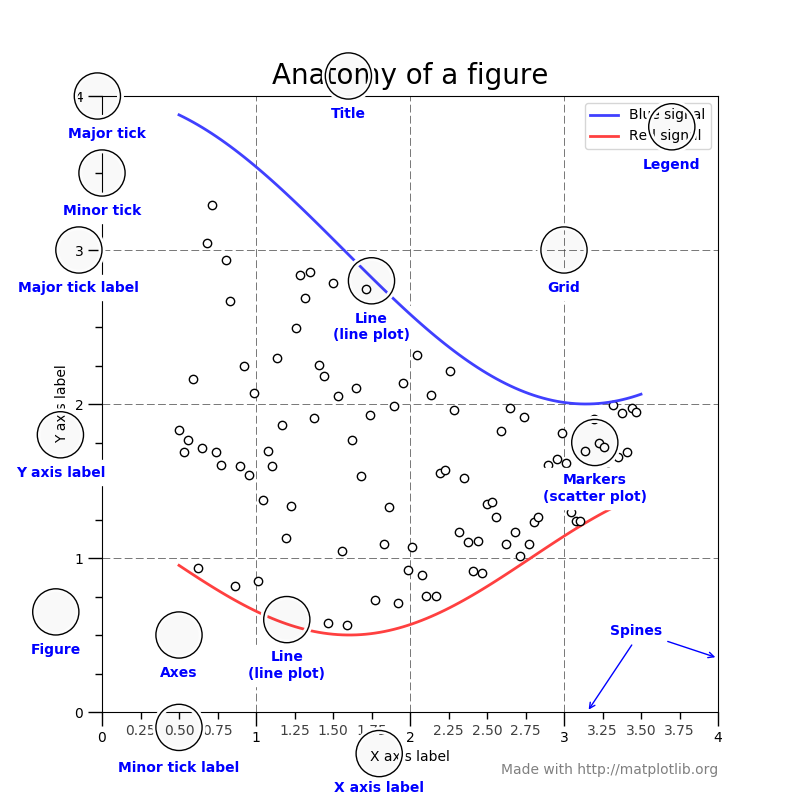

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Разберем пример показывающий какие элементы рисунка могут быть на области рисования и какие у них могут быть настройки. Мы нарисуем рисунок на котором будет
 - одна область рисования
 - заголовок рисунка
 - заголовок графика
 - график функции $\cos(x^2)$
 - аннотация
 - текст в рамке
 - подписи к осям X и Y
 - легенда
 - координатная сетка

Все именованные параметры функций являются опциональными.

Ожидаем следующий результат:

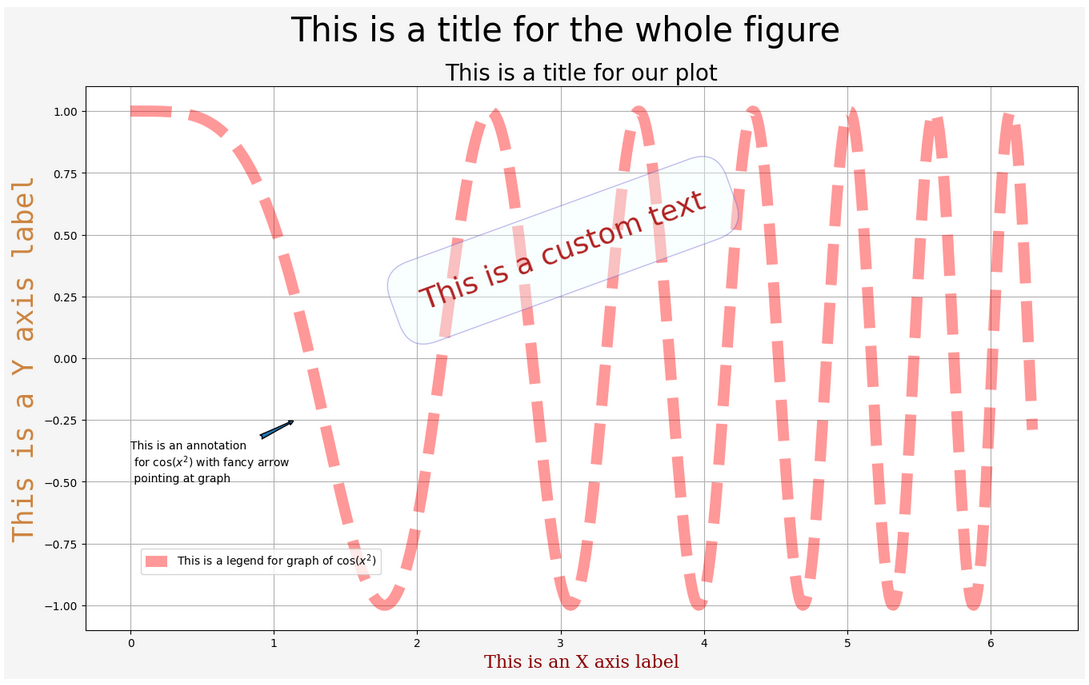

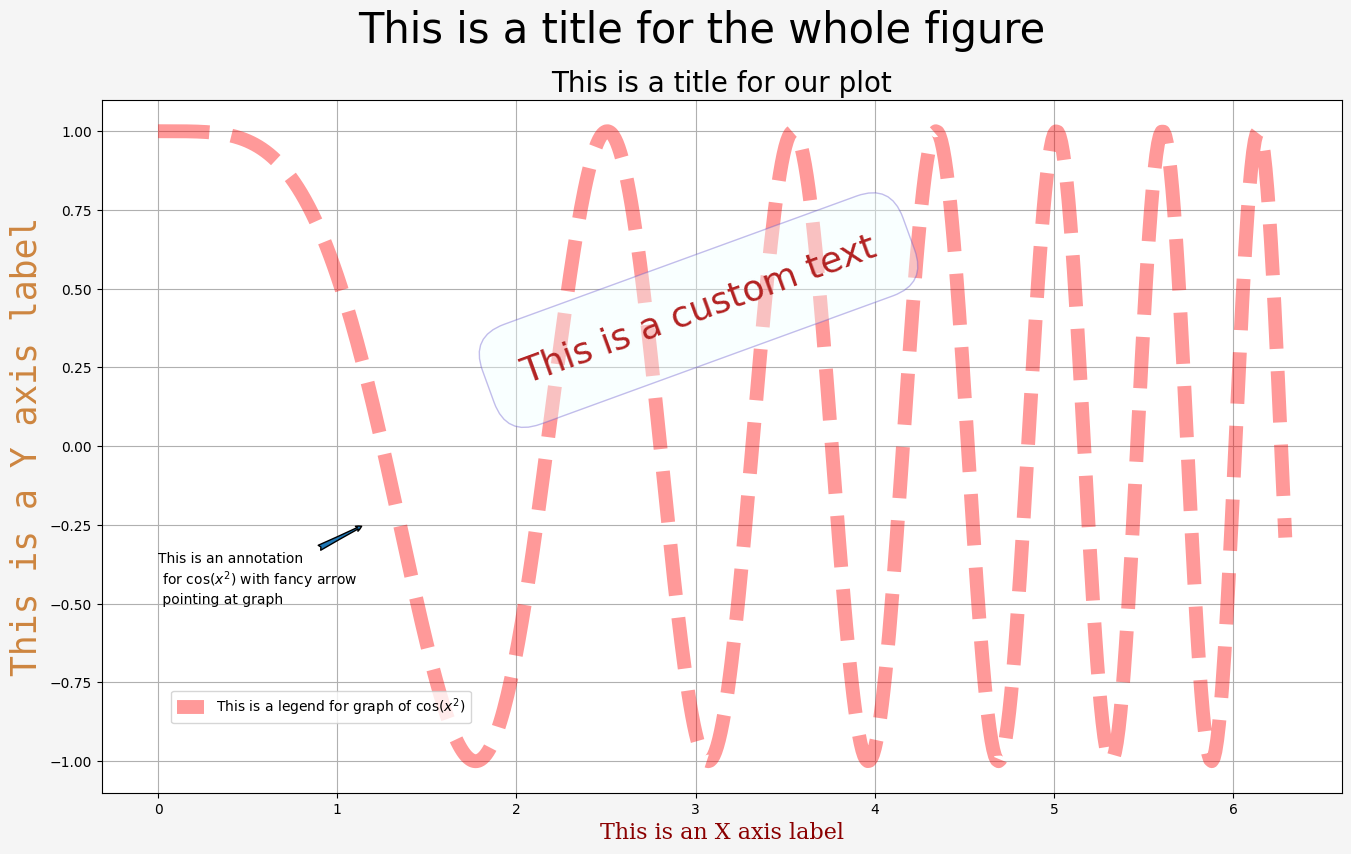

In [2]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок
fig = plt.figure(
    figsize=(16, 9),  # размером 16 на 9 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=100  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30)

# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    color='red',  # Цвет пурпурный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at graph',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
)

# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=5  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', color='darkred', weight='normal', size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', color='peru', weight='light', size=25)
)

# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid(True)

plt.show()
del step, x, y, fig

## Разные типы графиков на одном рисунке

Мы нарисуем
 - набор случайных измерений функци $cos(x)$ к которому добавив белый шум с нулевым средним и дисперсией 0.25
 - собственно график cos(x)
 - и область в которой лежат изменения отстоящие не более чем на 1 сигму

Ожидаем следующий результат:

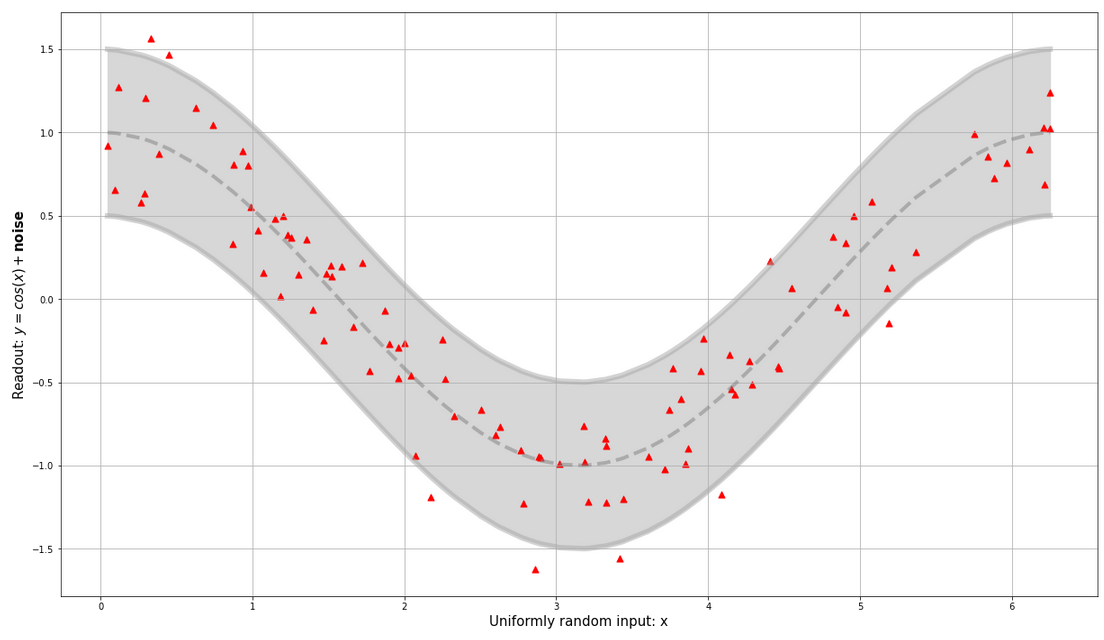

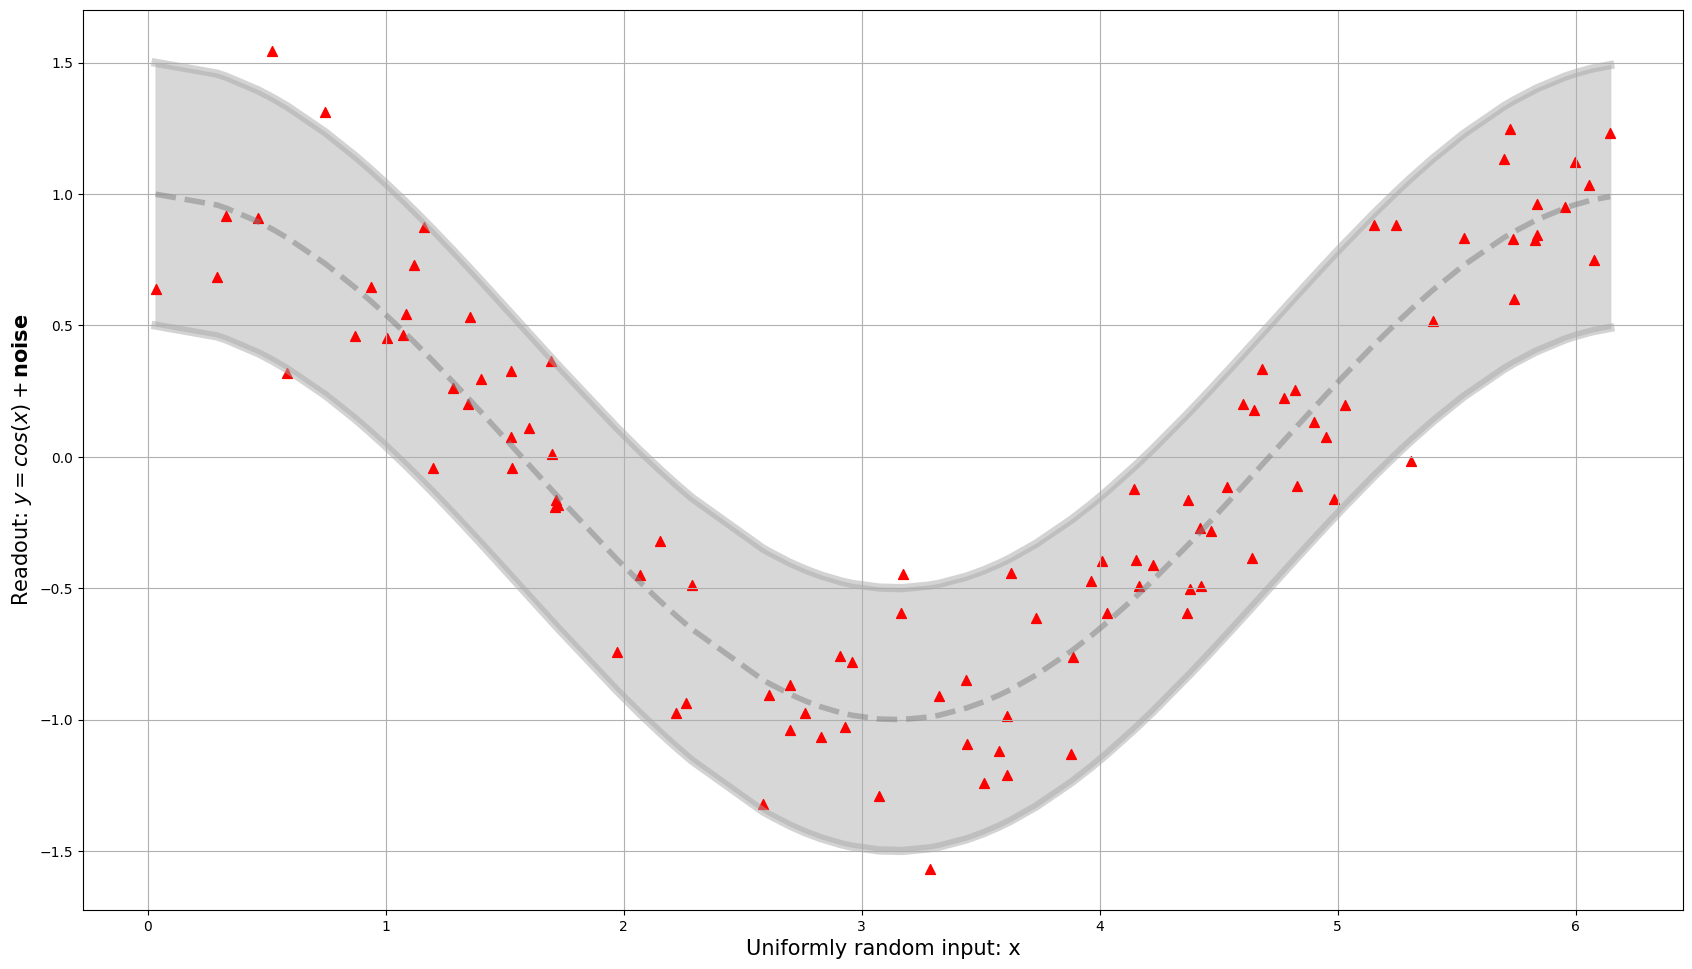

In [3]:
# Готовим данные
scale = 0.5
n_points = 100
x = 2 * np.pi * np.sort(np.random.rand(n_points))
y = np.cos(x)
y_noise = y + np.random.normal(scale=0.25, size=n_points)

# Готовим рисунок
fig = plt.figure(figsize=(16, 9))
# Готовим область рисования.
ax = fig.add_axes([0, 0, 1, 1])

# График самой функции cos(x)
ax.plot(
    x, y,
    color='grey',
    linestyle='--',
    alpha=0.5,
    linewidth=4
)

# Графики отклоненний на 1 сигму
for shift in (scale, -scale):
    ax.plot(
        x, y + shift,
        alpha=0.5,
        color='darkgrey',
        linewidth=6
    )

# Сделаем заливку всего что находится между отклонениями
ax.fill_between(
    x, y - scale, y + scale,
    alpha=0.9,
    color='lightgrey',
)

# Собственно scatter plot
ax.scatter(
    x, y_noise,
    marker='^',  # Отмечаем точки треугольниками
    s=50,  # Размера 50
    color='red'  #  Красного цвета
)

# Подпишем оси
ax.set_xlabel('Uniformly random input: x', fontsize=15)
ax.set_ylabel('Readout: $y=cos(x)+\mathbf{noise}$', fontsize=15)

ax.grid(True)

plt.show()
del scale, n_points, x, y, y_noise, fig, ax

Как вы видели по последним примерам большая часть рисования происходит через работу с областью рисования (Axes). Этот объект-контейнер содержит в себе другие контейнеры и объекты-примитивы. Видно, что существует множество методов для создания и изменения свойств элементов рисунков и графических примитивов. Всё, что можно сделать через pyplot, можно сделать работая непосредственно с axes-экземплярами. Получаются такие соответствия:

Метод объекта Axes -> Краткое описание -> объект типа Artist создаваемый методом -> Контейнер в котором будет храниться Artist

    ax.annotate -> текстовая подпись -> Annotate -> ax.texts

    ax.text -> текст -> Text -> ax.texts

    ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

    ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

    ax.fill -> заливка области -> Polygon -> ax.patches

    ax.hist -> гистограмма -> Rectangle -> ax.patches

    ax.imshow -> изображение -> AxesImage -> ax.images

    ax.legend -> легенда -> Legend -> ax.legends

    ax.plot -> XY график -> Line2D -> ax.lines

    ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections


## Координатные оси

В matplotlib оси координат являются элементом рисунка, а точнее контейнером типа Artist. Примеры - оси $x$, $y$ в декартовой системе координат, оси $r$, $\phi$ в полярной системе координат. Каждая ось содержит три группы графических примитивов: деления осей (ticks), подписи делений (tick lables), подписи осей (axis labels).

Деления на оси бывают главные и вспомогательные. Чтобы получить к ним доступ надо в методе get_ticks в аргумент which передавать 'major' или 'minor'. По умолчанию отображаются только major деления.

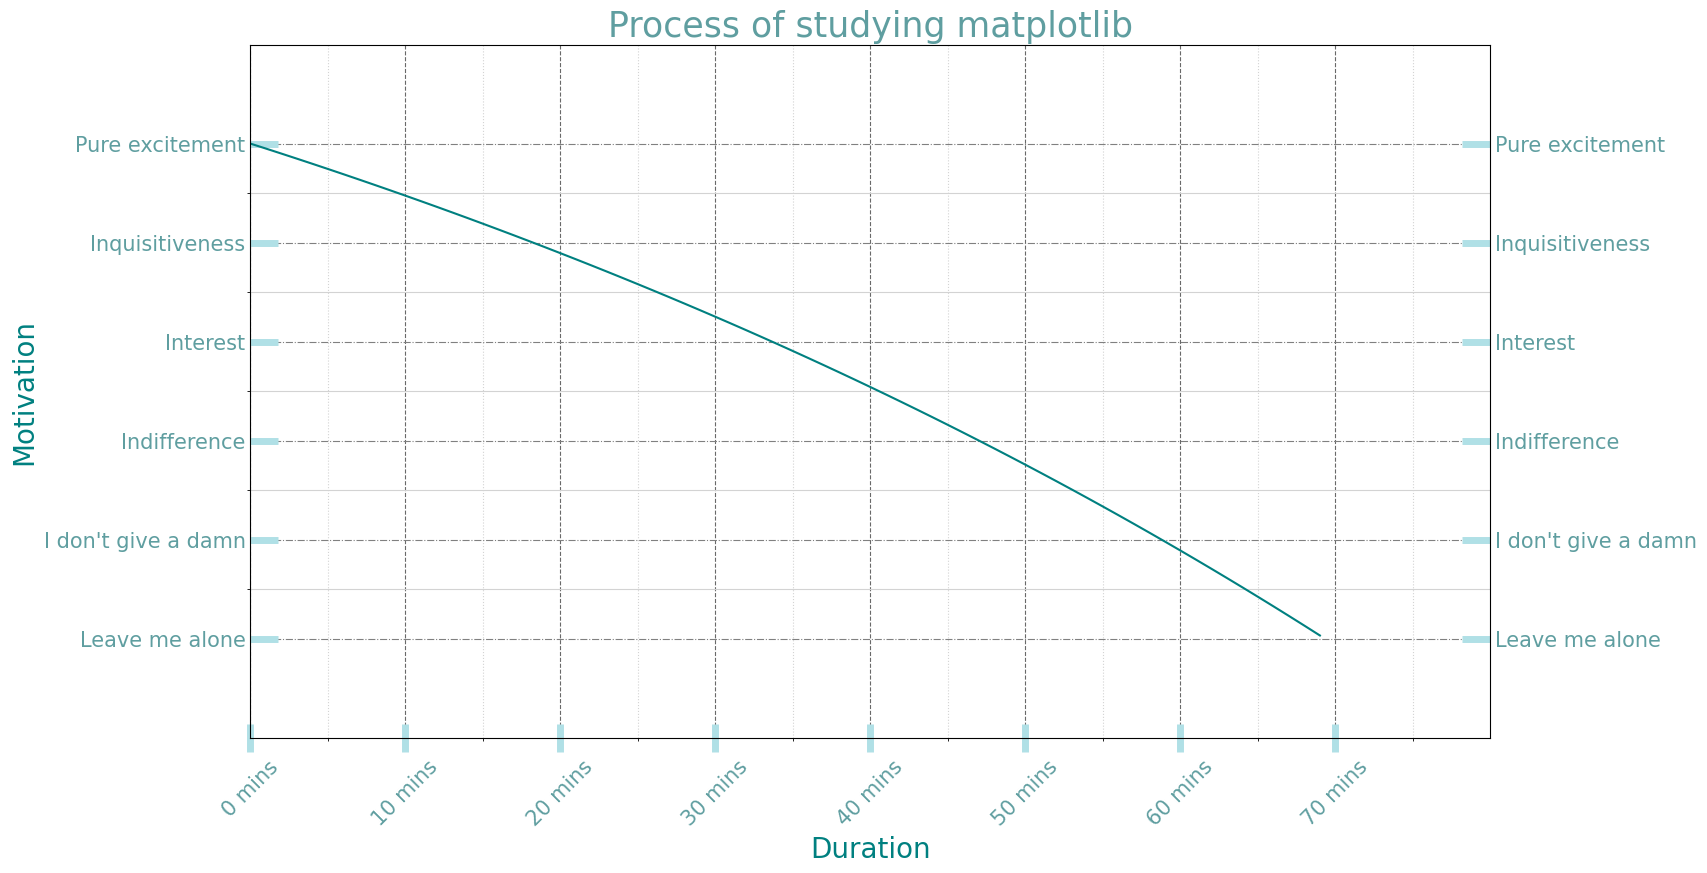

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
ax.set_title('Process of studying matplotlib', fontsize=25, color='cadetblue')

# Здесь все как обычно - рисуем линию
ax.plot(
    np.arange(70),
    2 - np.exp(0.01 * np.arange(70)),
    color='teal'
)

# Задаем положения вспомогательных делений на оси Х
ax.set_xticks(np.arange(5, 85, 10), minor=True)
# Задаем положения основных делений
ax.set_xticks(np.arange(0, 80, 10))
# Задаем диапазон значений x который будет отрисовываться. Обынчно он шире диапазона делений
ax.set_xlim(0, 80)
# Ставим подписи к основным делениям на оси x
ax.set_xticklabels(
    ['{} mins'.format(t) for t in range(0, 80, 10)],  # текст надписей
    rotation=45,  # угол поворота надписей
    fontsize=15,
    color='cadetblue'
)
# Настраиваем параметры основных делений на оси X
ax.tick_params(
    axis='x',
    which='major',
    direction='inout', # деления будут пересекать ось
    length=20,  # длина делений в точках
    width=5,  # ширина делений в точках
    color='powderblue',
    top=False, bottom=True,  # рисуем делениями только снизу
    labeltop=False, labelbottom=True  # рисуем подписи к делениям только снизу
)

# Для оси Y все настройки аналогичны
ax.set_yticks(np.arange(0.1, 1, 0.2), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(-0.2, 1.2)
ax.set_yticklabels(
    ['Leave me alone', 'I don\'t give a damn', 'Indifference', 'Interest', 'Inquisitiveness', 'Pure excitement'],
    fontsize=15,
    color='cadetblue'
)
ax.tick_params(
    axis='y', which='major',
    direction='in',
    length=20, width=5, color='powderblue',
    left=True, right=True,
    labelleft=True, labelright=True
)

# Делаем подписи к осям
ax.set_xlabel('Duration', color='teal', fontsize=20)
ax.set_ylabel('Motivation', color='teal', fontsize=20)

# Для основных делений оси x мы строим координатную сетку пунктирной линией
ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
# Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
# Аналогично настраиваются параметры для координатной сетки по оси Y
ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')

plt.show()

При всем том, что ноутбук получился очень большим, мы не обсудили еще очень много тем: глобальные настройки через rcParams, работа со шрифтами, палитры, специальный дизайн шкалы на температурной карте и т.д. и т.п. Если вам понадобятся такие возможности matplotlib, то пора садиться за [серьезные книжки](http://index-of.co.uk/Tutorials/Matplotlib%20for%20Python%20Developers.pdf) или даже [читать документацию](https://matplotlib.org/index.html).

## Extra. Галерея примеров

У Matplotlib имеется галерея примеров, чтобы увидеть какие еще графики с его помощью можно получать: https://matplotlib.org/gallery/index.html